In [1]:
%matplotlib ipympl
import numpy as np
import sys

#Dependencies: pygrpm, periodictable
from pygrpm.material.nistparser import get_attenuations

# setting path for mask_utils package
sys.path.append('..')
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def get_transmission(material, thickness=0.1, density=1.0, energies=np.arange(1,50.1,0.1)):
	"""
	Returns the transmission of a thickness (um) layer
	of material, with density in g/cm2 over the array energies (in keV)
	"""
	# Get the total attenuation cross section
	mu = np.array(get_attenuations(material, energies, option='ph')) #considering only Photoelectric. Change in 'total' for total att.
	# Transmission is exp(-density * mu * thickness)
	transmission = np.exp(-density * mu * thickness/10000.)
	return transmission

# Dead layers:
* MLI
    * 150 nm SiO2
    * 300 nm Al
    * 12.5 um Kapton
* MMOD Shield
    * 15 um PP (or 25 um Be)
* SDD dead layers
    * 540 nm SiO2, 100% filling factor
    * 500 nm Al, 93% filling factor
    * 100 nm SiO2, 100% filling factor
    * 500nm Si, 100% filling factor
    * 3.5um Si, 17% filling factor

# SDD bulk
* 450 um Si

In [3]:
ene=np.arange(1,50.2,0.1)

Al =  {"Formula": "Al", "rho": 2.71}
PP =  {"Formula": "C3H6", "rho": 0.9}
Kapton = {"Formula": "C22H10N2O5", "rho": 1.43}
Si = {"Formula": "Si", "rho": 2.33}
SiO2 = {"Formula": "SiO2", "rho": 2.2}
Be = {"Formula": "Be", "rho": 1.848}

In [4]:
Al_trans     = get_transmission(Al['Formula'], 0.1, Al['rho'], ene)
PP_trans     = get_transmission(PP['Formula'], 0.1, PP['rho'], ene)
Be_trans     = get_transmission(Be['Formula'], 0.1, Be['rho'], ene) #used as PP alternative
Kapton_trans = get_transmission(Kapton['Formula'], 0.1, Kapton['rho'], ene)
Si_trans     = get_transmission(Si['Formula'], 0.1, Si['rho'], ene)
SiO2_trans   = get_transmission(SiO2['Formula'], 0.1, SiO2['rho'], ene)

In [5]:
#Transmission of dead layers
MLI_trans = pow(SiO2_trans, 1.5) * pow(Al_trans, 3) * pow(Kapton_trans, 125) #150nm SiO2 + 300nm Al + 12.5um Kapton
MMOD_trans = pow(PP_trans, 150) #15um PP
#MMOD_trans = pow(Be_trans, 250) #25um Be

SDD_SiO2_1_trans = pow(SiO2_trans, 5.4)      #540nm SiO2, 100%
SDD_Al_trans     = pow(Al_trans, 5) * 0.93  + (1-0.93) #500nm Al, 93% filling factor
SDD_SiO2_2_trans = pow(SiO2_trans, 1)        #100nm SiO2, 100%
SDD_Si_1_trans   = pow(Si_trans, 5)         #500nm Si, 100%
SDD_Si_2_trans   = pow(Si_trans, 35) * 0.17 + (1-0.17) #3.5um Si, 17% filling factor

SDD_trans = SDD_SiO2_1_trans * SDD_Al_trans * SDD_SiO2_2_trans * SDD_Si_1_trans * SDD_Si_2_trans

Tot_trans = MLI_trans * MMOD_trans * SDD_trans


#SDD bulk quantum efficiency
SDD_qe = (1-pow(Si_trans, 4500)) #450um Si


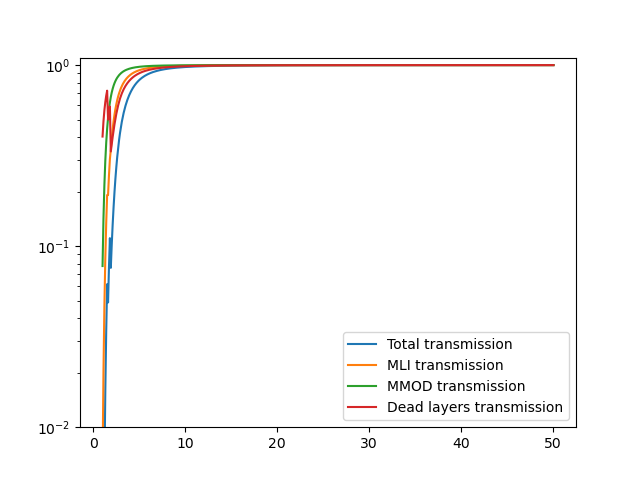

In [6]:
plt.figure()
plt.plot(ene, Tot_trans, label="Total transmission")
plt.plot(ene, MLI_trans, label="MLI transmission")
plt.plot(ene, MMOD_trans, label="MMOD transmission")
plt.plot(ene, SDD_trans, label="Dead layers transmission")
plt.yscale('log')
plt.ylim( (0.01, 1.1))
plt.legend()
plt.show()

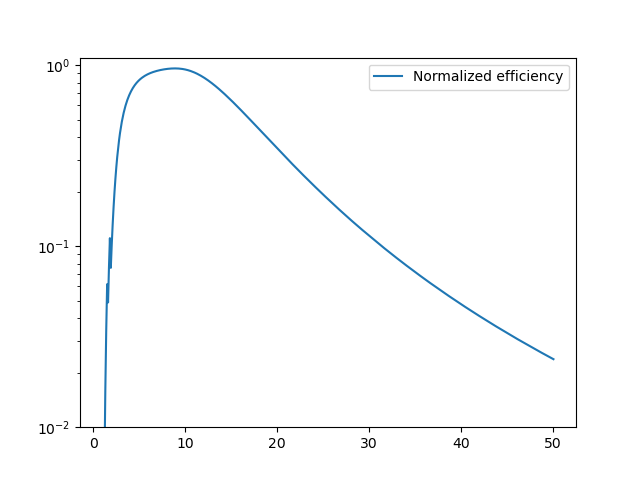

In [7]:
plt.figure()
plt.plot(ene, Tot_trans * SDD_qe, label="Normalized efficiency")
plt.yscale('log')
plt.ylim( (0.01, 1.1))
plt.legend()
plt.show()